#  Modelos de Semántica Distributiva

## Embeddings de palabras

Cuando hablamos de procesamiento del lenguaje natural, estamos discutiendo la capacidad de un modelo de aprendizaje automático para conocer el significado del texto por sí solo y realizar ciertas funciones similares a las humanas, como predecir la siguiente palabra u oración, escribir un ensayo basado en la información dada. tema, o para conocer el sentimiento detrás de la palabra o un párrafo.

Algunas técnicas conocidas como Bag of Words son buenas para datos a pequeña escala, pero carecen en la extracción de significado de una oración o párrafo, además su destreza es limitada ya que no le importa el orden de las palabras.

Bueno, necesitábamos encontrar una solución en la que pudiéramos confiar, el embbeding  de palabras(Word Embedding) resuelve la mayoría de los problemas.

#### ¿Por qué embbeding de palabras ?

Lo que hace que el embbeding de palabras sea diferente y poderoso de otras técnicas, es que funciona con las limitaciones de estas como *Bag of words* y otras técnicas. Algunos puntos que hacen que el embbeding de palabras sea mejor que otras son:

- Una mejor comprensión de las palabras y oraciones que otras técnicas de NLP, también conocida como análisis lingüístico.

- Al aplicar el embbeding se reduce las dimensiones del conjunto de datos mejor que otras técnicas de NLP y, por lo tanto, funciona mejor.

- Requiere menos tiempo de ejecución o, en otras palabras, es más rápido en el entrenamiento que otros, ya que no requiere una enorme cantidad de pesos para entrenar como otras técnicas.

- No sigue el enfoque de la matriz dispersa, por lo que la hace mejor por razones computacionales.

## Representación de palabras

Así que ahora, con esa breve introducción fuera del camino, echemos un vistazo breve a algunas de las diferentes formas en que podemos representar numéricamente las palabras.

### Codificación One-Hot 

Una de las formas más básicas en que podemos representar palabras numéricamente es mediante el método de codificación one-hot (también llamado a veces vectorización de conteo ).

La idea es super simple. Cree un vector que tenga tantas dimensiones como palabras únicas tenga su corpus. Cada palabra única tiene una dimensión única y estará representada por un 1 en esa dimensión y con ceros en las demás partes.

¿El resultado de esto? Vectores realmente enormes y escasos que no capturan absolutamente ninguna información relacional. Podría ser útil si no tiene otra opción. Pero tenemos otras opciones, si necesitamos esa información de relación semántica.

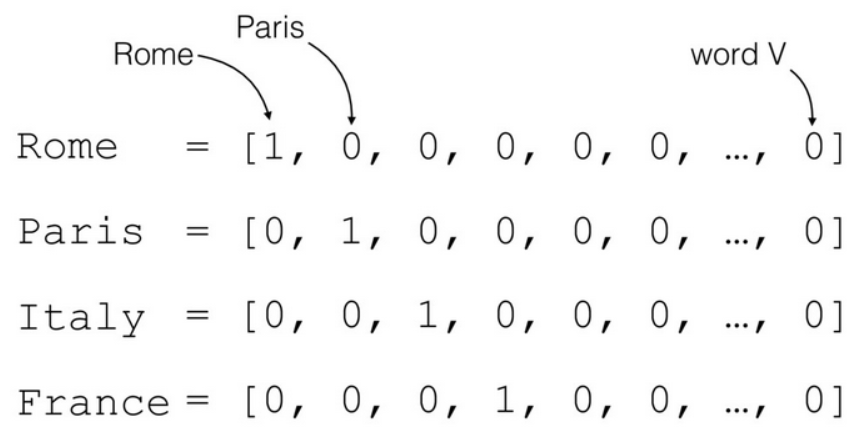

### Matriz de co-ocurrencia
Una matriz de co-ocurrencia es exactamente lo que parece: una matriz gigante que es tan larga y tan ancha como el tamaño del vocabulario. Si las palabras aparecen juntas, se marcan con una entrada positiva. De lo contrario, tienen un 0. Se reduce a una representación numérica que simplemente hace la pregunta de “¿Las palabras ocurren juntas? Si es así, cuente esto ".

¿Y qué podemos ver que ya se convertirá en un gran problema? ¡Representación super grande! Si pensamos que la codificación one-hot era de alta dimensión, entonces la co-ocurrencia es un cuadrado de alta dimensión. Eso es una gran cantidad de datos para almacenar en la memoria.

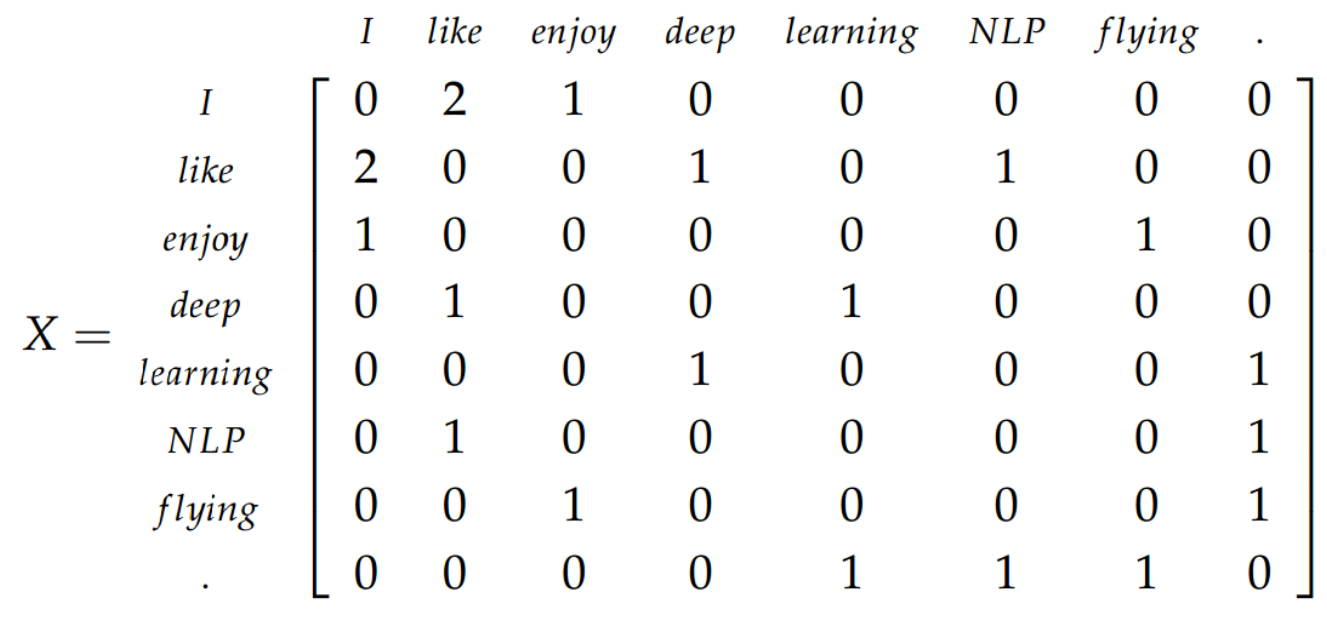

### Dictionary Lookup

El enfoque más simple es una búsqueda de ID de palabras en el diccionario. Los pasos básicos de este enfoque son los siguientes.

Primero, se tomea el corpus que puede ser una colección de palabras, oraciones o textos. Preprocesarlos en un formato deseado. Una forma es usar la lematización (proceso de conversión de palabras a su forma básica). Por ejemplo, dadas las palabras caminar, walk, walking, walks y waked, su lema sería walk. Luego, guarde el vocabulario de las palabras preprocesadas en un archivo como "vocabulary.txt". 


In [1]:
import tensorflow.compat.v1 as tf
num_oov_buckets = 3
vocab = ["emerson", "lake", "palmer", "crimnson"] # Nuestro vocabulario

# Creamos un archivo temporal
import tempfile
f = tempfile.NamedTemporaryFile(delete=False)
f.write('\n'.join(vocab).encode('utf-8'))
f.close()

El vocab hará realizará el siguiente mapeo:

emerson -> 0

lake -> 1

palmer -> 2

crimnson -> 3

<other term> -> bucket_id, donde bucket_idestará entre 4 y 4 + num_oov_buckets - 1 = 8, calculado por: hash(<term>) % num_oov_buckets + vocab_size
    
Si el tensor de entrada _ es:

In [2]:
init = tf.lookup.TextFileInitializer(
    f.name,
    key_dtype=tf.string, key_index=tf.lookup.TextFileIndex.WHOLE_LINE,
    value_dtype=tf.int64, value_index=tf.lookup.TextFileIndex.LINE_NUMBER)
table = tf.lookup.StaticVocabularyTable(init, num_oov_buckets)
table.lookup(tf.constant(["palmer", "crimnson" , "king",
                          "tarkus", "black", "moon"])).numpy()

array([2, 3, 5, 6, 6, 4])

## Modelos de lenguaje

### Modelo probabilístico neuronal
Ahora, podemos empezar a entrar en algunas redes neuronales. Un modelo probabilístico neuronal aprende una incrustación al lograr alguna tarea como modelado o clasificación y es en lo que se basan más o menos el resto de estas incrustaciones.

Por lo general, limpia su texto y crea vectores codificados en un solo uso. Luego, define el tamaño de su representación (300 dimensiones podrían ser buenas). A partir de ahí, inicializamos el embbeding  a valores aleatorios. Es el punto de entrada a la red y la propagación hacia atrás se utiliza para modificar el embbeding  en función de cualquier tarea objetivo que tengamos.

Por lo general, esto requiere una gran cantidad de datos y puede ser muy lento. La compensación aquí es que aprende una incorporación que es buena para los datos de texto en los que se entrenó la red, así como para la tarea de NLP que se aprendió conjuntamente durante el entrenamiento.

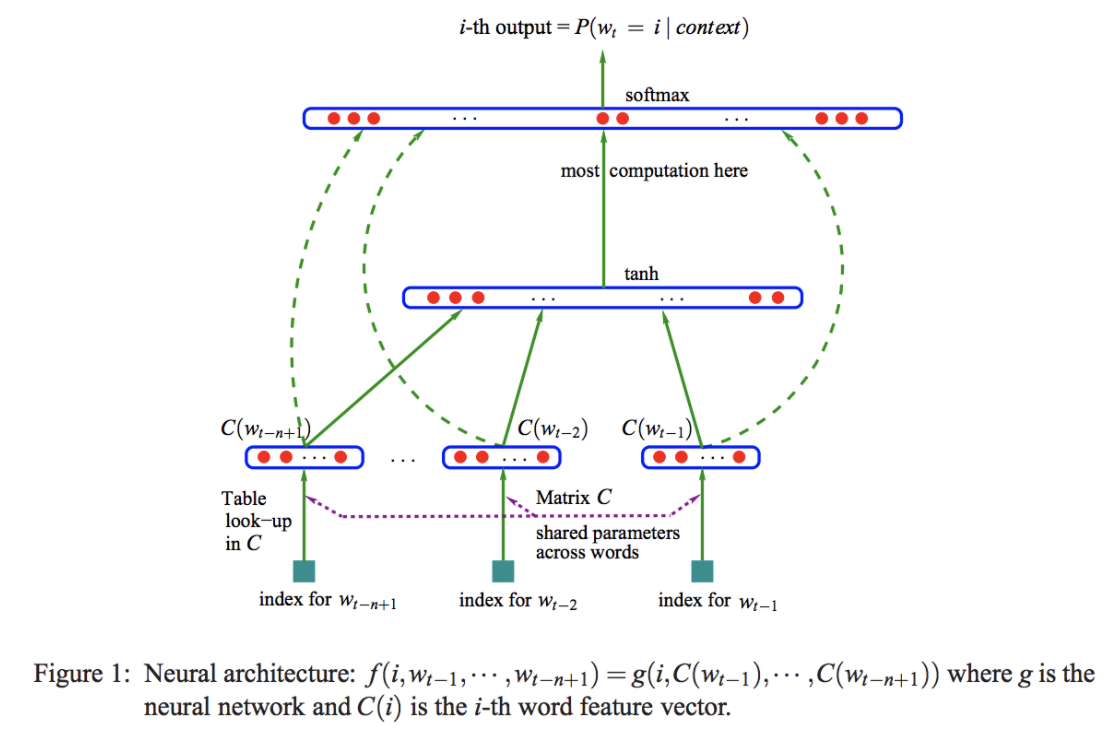

### Modelo word2vec

Word2Vec es un mejor sucesor del modelo probabilístico neuronal. Todavía usamos un método de cálculo estadístico para aprender de un corpus de texto, sin embargo, su método de entrenamiento es más eficiente que el simple entrenamiento incrustado. Es más o menos el método estándar para entrenar incrustaciones.

También es el primer método que demostró la aritmética vectorial clásica para crear analogías:



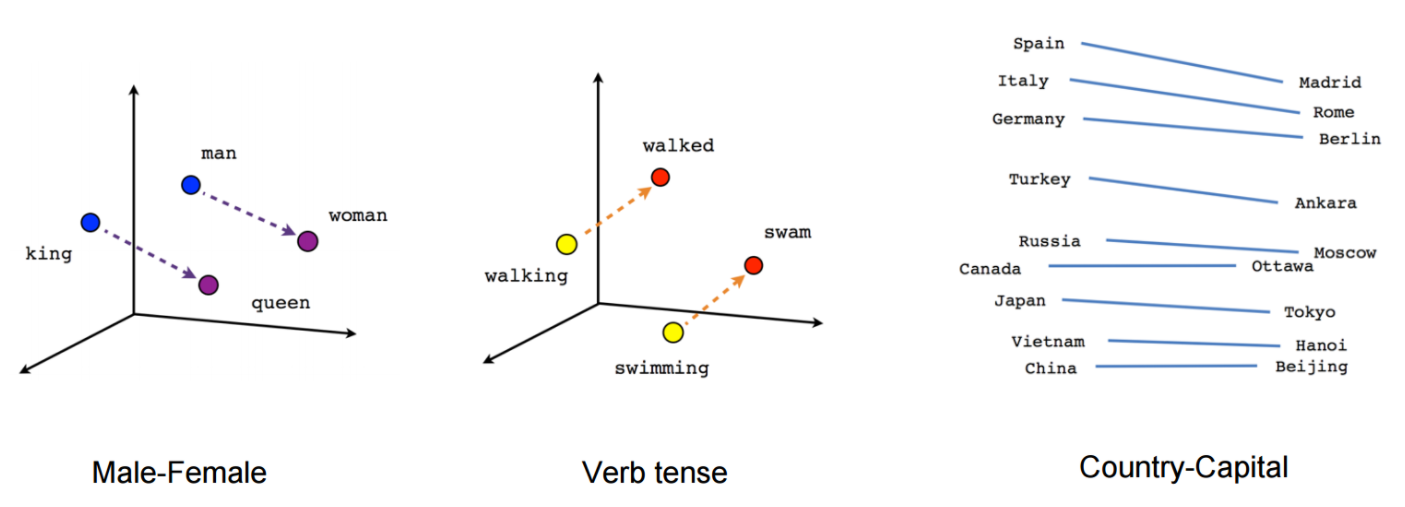

Hay dos enfoques principales para el aprendizaje:

#### Continuous Bag-of-Words (CBOW)
Este método aprende una incrustación al predecir las palabras actuales según el contexto. El contexto está determinado por las palabras circundantes.

#### Skip-gram
Este método aprende una incrustación al predecir las palabras circundantes dado el contexto. El contexto es la palabra actual.

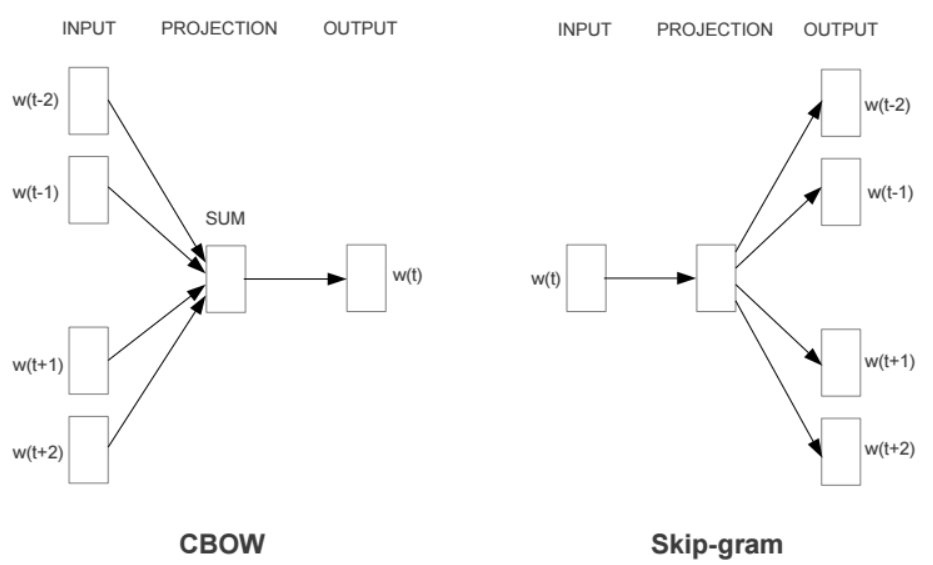

Ambos métodos de aprendizaje utilizan el contexto de uso de palabras locales (con una ventana definida de palabras vecinas). Cuanto más grande es la ventana, más similitudes de actualidad se aprenden mediante el embbeding . Forzar una ventana más pequeña da como resultado más similitudes semánticas, sintácticas y funcionales que aprender.

Entonces, ¿cuáles son los beneficios? Bueno, las incrustaciones de alta calidad se pueden aprender de manera bastante eficiente, especialmente cuando se comparan con modelos probabilísticos neuronales. Eso significa poco espacio y poca complejidad de tiempo para generar una representación mejor. Más que eso, cuanto mayor sea la dimensionalidad, más características podemos tener en nuestra representación. Pero aún así, podemos mantener la dimensionalidad mucho más baja que con otros métodos. También nos permite generar de manera eficiente algo así como un corpus de mil millones de palabras, pero abarcar un montón de generalidades y mantener la dimensionalidad pequeña.

#### GloVe

**Glo**bal **Ve**ctors for Word Representation, o GloVe, es un algoritmo de aprendizaje no supervisado para obtener representaciones vectoriales de palabras. En pocas palabras, GloVe nos permite tomar un corpus de texto y transformar intuitivamente cada palabra en ese corpus en una posición en un espacio de alta dimensión. Esto significa que las palabras similares se colocarán juntas.

GloVe es una modificación de word2vec, y mucho mejor. Existe un conjunto de modelos vectoriales clásicos utilizados para el procesamiento del lenguaje natural que son buenos para capturar estadísticas globales de un corpus, como LSA (factorización matricial). Son muy buenos con la información global, pero no captan tan bien los significados y definitivamente no tienen las funciones de analogía integradas.

La contribución de GloVe fue la adición de estadísticas globales en la tarea de modelado del lenguaje para generar el embbeding . No existe una función de ventana para el contexto local. En cambio, existe una matriz de co-ocurrencia palabra-contexto / palabra que aprende estadísticas en todo el corpus.

¿El resultado? Se aprende una integración mucho mejor que la simple word2vec.

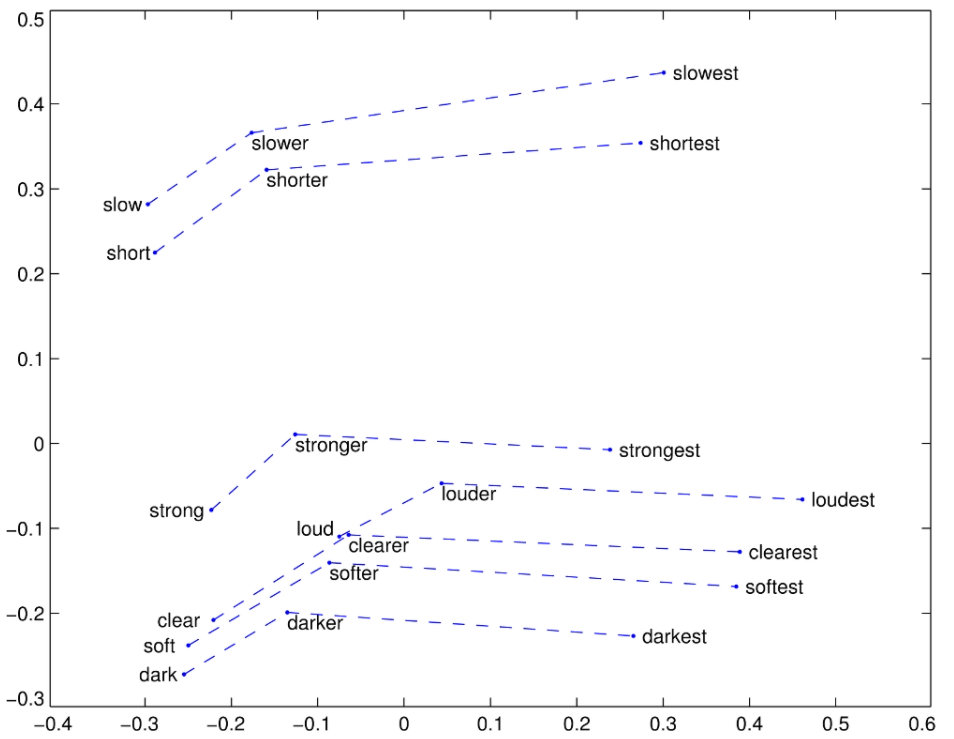

#### Ejemplo en Python con Keras

In [5]:
#!pip3 install keras
#!pip3 install tensorflow --user
#!pip3 install nltk
!pip3 install matplotlib


  Using cached matplotlib-3.4.2-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)
  Using cached kiwisolver-1.3.1-cp39-cp39-manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [7]:
# Importar bibliotecas importantes e inicializar el conjunto de datos
import numpy as np
from matplotlib import pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # The Natural Language Toolkit
import keras
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Model

f = open("./advs.txt")
text = f.read()
f.close()

[nltk_data] Downloading package stopwords to /home/bryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

Usamos la función .lower() para convertir todas las cadenas en mayúsculas a cadenas en minúsculas.
Usamos la función re.sub() para sustituir expresiones regulares.
Además eliminamos palabras irrelevantes.

In [ ]:
data = text[:]
#print(data)

In [ ]:
# Preprocesamiento de datos

data = data.lower()
data = re.sub('[^A-Za-z]+',' ', data)
data = data.split()
stop_words = stopwords.words('english') # Esta variable son las palabras en inglés que no agregan mucho significado a una oración. 

data = [word for word in data if word not in stop_words]  

Creamos el vocabulario y le asignamos valores unicos

In [ ]:
vocabulary, counts = np.unique(data, return_counts=True)

vocabulary.shape, counts.shape, vocabulary

Implementar la codificación de vector one-hot para preprocesar características categóricas en el modelo de aprendizaje automático.

In [ ]:
def get_one_hot_vector(word):
    vec = np.zeros((vocabulary.shape[0], ))
    index = (vocabulary == word).argmax()
    vec[index] = 1
    return vec

dataset = []

for word in data:
    dataset.append(get_one_hot_vector(word))

dataset = np.asarray(dataset)
dataset.shape, dataset

Asignar X e y para entrenamiento y prueba, y luego dividirlos

In [ ]:
X = np.zeros((dataset.shape[0]-1, dataset.shape[1]*2)) # Bigram (se han usado n-gramas para extraer características comun)

for i in range(X.shape[0]-1):
    X[i] = np.hstack((dataset[i], dataset[i+1]))

print(X[0], X[0].shape, X.shape)

In [ ]:
y = dataset[1:]

split = int(0.85 * X.shape[0])

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]


X_train.shape, X_test.shape, y_train.shape, y_test.shape

Implementando el embbeding  de palabras usando keras

In [ ]:
embedding = 300

inp = Input(shape=(15356,))
emb = Dense(embedding, activation='tanh')(inp)
emb = Dropout(0.4)(emb)
out = Dense(7678, activation='softmax')(emb)

model = Model(inputs=inp, outputs=out)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

encoder = Model(inputs=inp, outputs=emb)

In [ ]:
hist = model.fit(X_train, y_train,
                epochs=12,
                shuffle=False, # Si se deben mezclar los datos de entrenamiento antes de cada época
                batch_size=1024, # Tamaño de lote
                validation_data=(X_test, y_test))

In [ ]:
plt.figure()
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['val_loss'], 'g')
plt.show()

In [ ]:
plt.figure()
plt.plot(hist.history['accuracy'], 'b')
plt.plot(hist.history['val_accuracy'], 'g')
plt.show()

In [ ]:
a = encoder.predict(X)
w2v = {}
alpha = 0.9

for i in range(X.shape[0]):
    try:
        old_vec = w2v[vocabulary[y[i].argmax()]]
        new_vec = alpha*old_vec + (1-alpha)*a[i]
        w2v[vocabulary[y[i].argmax()]] = new_vec
    except:
        w2v[vocabulary[y[i].argmax()]] = a[i]

print(len(w2v.keys()))

Similitudes mediante coseno

In [ ]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2)/np.sqrt((v1**2).sum()*(v2**2).sum())

v1 = w2v['sherlock']
v2 = w2v['holmes']

v1, v2

In [ ]:
print(cosine_similarity(v1, v2))

In [ ]:
v1 = w2v['sherlock']
v2 = w2v['sherlock']
print(cosine_similarity(v1, v2))

In [ ]:
v1 = w2v['sherlock']
v2 = w2v['watson']
print(cosine_similarity(v1, v2))

In [ ]:
v1 = w2v['majesty']
v2 = w2v['king']
print(cosine_similarity(v1, v2))

## 1. Embeddings de palabras multilingües

Los modelos multilingües son un tipo de modelo de aprendizaje automático que puede comprender diferentes idiomas. Un ejemplo sería clasificar si un fragmento de texto es un comentario tóxico. Usando un modelo regular de aprendizaje automático, podríamos detectar solo comentarios tóxicos en inglés, pero no comentarios tóxicos hechos en español. Pero si utilizáramos un modelo multilingüe, podríamos detectar comentarios tóxicos en inglés, español y muchos otros idiomas.

Esta sección configura el entorno para acceder al módulo Codificador de oraciones universal multilingüe y también prepara un conjunto de oraciones en inglés y sus traducciones. En las siguientes secciones, el módulo multilingüe se utilizará para calcular la similitud entre idiomas .

In [ ]:
# Instalamos la última versión de Tensorflow.
#!pip install tensorflow_text
#!pip install bokeh
#!pip install simpleneighbors[annoy]
#!pip install tqdm

In [16]:
import bokeh
import bokeh.models
import bokeh.plotting
import numpy as np
import os
import pandas as pd
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow_text import SentencepieceTokenizer
import sklearn.metrics.pairwise

from simpleneighbors import SimpleNeighbors
from tqdm import tqdm
from tqdm import trange

def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2,
                         plot_title,
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):
    assert len(embeddings_1) == len(labels_1)
    assert len(embeddings_2) == len(labels_2)

    # Similitud de texto basada en arccos
    sim = 1 - np.arccos(
        sklearn.metrics.pairwise.cosine_similarity(embeddings_1,
                                                   embeddings_2))/np.pi

    embeddings_1_col, embeddings_2_col, sim_col = [], [], []
    for i in range(len(embeddings_1)):
        for j in range(len(embeddings_2)):
            embeddings_1_col.append(labels_1[i])
            embeddings_2_col.append(labels_2[j])
            sim_col.append(sim[i][j])
    df = pd.DataFrame(zip(embeddings_1_col, embeddings_2_col, sim_col),
                      columns=['embeddings_1', 'embeddings_2', 'sim'])

    mapper = bokeh.models.LinearColorMapper(
        palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=df.sim.min(),
        high=df.sim.max())

    p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                              x_axis_location="above",
                              y_range=[*reversed(labels_2)],
                              plot_width=plot_width, plot_height=plot_height,
                              tools="save",toolbar_location='below', tooltips=[
                                  ('pair', '@embeddings_1 ||| @embeddings_2'),
                                  ('sim', '@sim')])
    p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
           fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

    p.title.text_font_size = '12pt'
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_standoff = 16
    p.xaxis.major_label_text_font_size = xaxis_font_size
    p.xaxis.major_label_orientation = 0.25 * np.pi
    p.yaxis.major_label_text_font_size = yaxis_font_size
    p.min_border_right = 300

    bokeh.io.output_notebook()
    bokeh.io.show(p)

In [17]:
# El módulo multilingüe de 16 idiomas es el predeterminado
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'

model = hub.load(module_url)

def embed_text(input):
    return model(input)

Con las incrustaciones de oraciones ahora en la mano, podemos visualizar la similitud semántica en diferentes idiomas.

Primero definimos un conjunto de oraciones traducidas a varios idiomas en paralelo. Luego, calculamos previamente las incrustaciones de todas nuestras oraciones.

In [18]:
# Algunos textos de diferente extensión en diferentes idiomas.
arabic_sentences = ['كلب', 'الجراء لطيفة.', 'أستمتع بالمشي لمسافات طويلة على طول الشاطئ مع كلبي.']
chinese_sentences = ['狗', '小狗很好。', '我喜欢和我的狗一起沿着海滩散步。']
english_sentences = ['dog', 'Puppies are nice.', 'I enjoy taking long walks along the beach with my dog.']
french_sentences = ['chien', 'Les chiots sont gentils.', 'J\'aime faire de longues promenades sur la plage avec mon chien.']
german_sentences = ['Hund', 'Welpen sind nett.', 'Ich genieße lange Spaziergänge am Strand entlang mit meinem Hund.']
italian_sentences = ['cane', 'I cuccioli sono carini.', 'Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane.']
japanese_sentences = ['犬', '子犬はいいです', '私は犬と一緒にビーチを散歩するのが好きです']
korean_sentences = ['개', '강아지가 좋다.', '나는 나의 개와 해변을 따라 길게 산책하는 것을 즐긴다.']
russian_sentences = ['собака', 'Милые щенки.', 'Мне нравится подолгу гулять по пляжу со своей собакой.']
spanish_sentences = ['perro', 'Los cachorros son agradables.', 'Disfruto de dar largos paseos por la playa con mi perro.']

# Ejemplo multilingüe
multilingual_example = ["Willkommen zu einfachen, aber", "verrassend krachtige", "multilingüe", "compréhension du langage naturel", "модели.", "大家是什么意思" , "보다 중요한", ".اللغة التي يتحدثونها"]
multilingual_example_in_en =  ["Bienvenido al simple pero", "sorprendentemente poderoso", "multilingüe", "comprensión del lenguaje natural", "modelo", "Lo que la gente quiere decir", "importa más que", "el idioma que hablan."]

In [19]:
# Calcular incrustaciones
ar_result = embed_text(arabic_sentences)
en_result = embed_text(english_sentences)
es_result = embed_text(spanish_sentences)
de_result = embed_text(german_sentences)
fr_result = embed_text(french_sentences)
it_result = embed_text(italian_sentences)
ja_result = embed_text(japanese_sentences)
ko_result = embed_text(korean_sentences)
ru_result = embed_text(russian_sentences)
zh_result = embed_text(chinese_sentences)

multilingual_result = embed_text(multilingual_example)
multilingual_in_en_result = embed_text(multilingual_example_in_en)

#### Visualización de similitud

Con las incrustaciones de texto en la mano, podemos tomar su producto punto para visualizar qué tan similares son las oraciones entre idiomas. Un color más oscuro indica que las incrustaciones son semánticamente similares.

In [20]:
visualize_similarity(multilingual_in_en_result, multilingual_result,
                     multilingual_example_in_en, multilingual_example,  "Codificador de Oraciones Universal Multilingüe para Recuperación Semántica (Yang et al., 2019)")

Loading BokehJS ...

In [21]:
visualize_similarity(en_result, es_result, english_sentences, spanish_sentences, 'Similitud Inglés-Español')

Loading BokehJS ...

In [22]:
visualize_similarity(zh_result, es_result, chinese_sentences, spanish_sentences, 'Similitud Chino-Español')

Loading BokehJS ...

In [23]:
visualize_similarity(zh_result, ko_result, chinese_sentences, korean_sentences, 'Similitud Chino-Koreano')

Loading BokehJS ...

### Creación de un motor de búsqueda multilingüe de similitud semántica

Mientras que en el ejemplo anterior visualizamos un puñado de oraciones, en esta sección construiremos un índice de búsqueda semántica de aproximadamente 200.000 oraciones a partir de un Corpus de Wikipedia. Aproximadamente la mitad estará en inglés y la otra mitad en español para demostrar las capacidades multilingües del Codificador Universal de Oraciones.

### Descargar datos al índice
Primero, descargaremos frases de noticias en varios idiomas del [News Commentary Corpus] (http://opus.nlpl.eu/News-Commentary-v11.php) [1]. Sin perder la generalidad, este enfoque también debería funcionar para indexar el resto de los idiomas admitidos.

Para acelerar la demostración, limitamos a 1000 frases por idioma. 

In [24]:
corpus_metadata = [
    ('ar', 'ar-en.txt.zip', 'News-Commentary.ar-en.ar', 'Arabic'),
    ('zh', 'en-zh.txt.zip', 'News-Commentary.en-zh.zh', 'Chinese'),
    ('en', 'en-es.txt.zip', 'News-Commentary.en-es.en', 'English'),
    ('ru', 'en-ru.txt.zip', 'News-Commentary.en-ru.ru', 'Russian'),
    ('es', 'en-es.txt.zip', 'News-Commentary.en-es.es', 'Spanish'),
]

language_to_sentences = {}
language_to_news_path = {}
for language_code, zip_file, news_file, language_name in corpus_metadata:
    zip_path = tf.keras.utils.get_file(
        fname=zip_file,
        origin='http://opus.nlpl.eu/download.php?f=News-Commentary/v11/moses/' + zip_file,
        extract=True)
    news_path = os.path.join(os.path.dirname(zip_path), news_file)
    language_to_sentences[language_code] = pd.read_csv(news_path, sep='\t', header=None)[0][:10000]
    language_to_news_path[language_code] = news_path

    print('{:,} {} Oraciones'.format(len(language_to_sentences[language_code]), language_name))

10,000 Arabic sentences
10,000 Chinese sentences
10,000 English sentences
10,000 Russian sentences
10,000 Spanish sentences



## Usando un modelo previamente entrenado para transformar oraciones en vectores

Calculamos las incrustaciones en _ batches_ para que quepan en la RAM de la GPU. 

In [25]:

batch_size = 2048
language_to_embeddings = {}
for language_code, zip_file, news_file, language_name in corpus_metadata:
    print('\nComputando {} embeddings'.format(language_name))
    with tqdm(total=len(language_to_sentences[language_code])) as pbar:
        for batch in pd.read_csv(language_to_news_path[language_code], sep='\t',header=None, chunksize=batch_size):
            language_to_embeddings.setdefault(language_code, []).extend(embed_text(batch[0]))
            pbar.update(len(batch))


Computing Arabic embeddings


83178it [04:00, 345.77it/s]                          



Computing Chinese embeddings


69206it [02:36, 441.12it/s]                          



Computing English embeddings


238853it [03:47, 1050.42it/s]                         



Computing Russian embeddings


190092it [03:27, 914.29it/s]                         



Computing Spanish embeddings


238819it [04:09, 958.44it/s]                         


## Construyendo un índice de vectores semánticos

Usamos la biblioteca [SimpleNeighbors] (https://pypi.org/project/simpleneighbors/) --- que es un contenedor para la biblioteca [Annoy] (https://github.com/spotify/annoy) --- para buscar eficazmente los resultados del corpus. 


In [26]:
%%time


num_index_trees = 40
language_name_to_index = {}
embedding_dimensions = len(list(language_to_embeddings.values())[0][0])
for language_code, zip_file, news_file, language_name in corpus_metadata:
    print('\nAñadiendo {} embeddings a indices'.format(language_name))
    index = SimpleNeighbors(embedding_dimensions, metric='dot')

    for i in trange(len(language_to_sentences[language_code])):
        index.add_one(language_to_sentences[language_code][i], language_to_embeddings[language_code][i])

    print('construyendo {} indice con {} arboles...'.format(language_name, num_index_trees))
    index.build(n=num_index_trees)
    language_name_to_index[language_name] = index


Adding Arabic embeddings to index


100%|██████████| 10000/10000 [06:29<00:00, 25.69it/s]


Building Arabic index with 40 trees...

Adding Chinese embeddings to index


100%|██████████| 10000/10000 [06:33<00:00, 25.43it/s]


Building Chinese index with 40 trees...

Adding English embeddings to index


100%|██████████| 10000/10000 [06:35<00:00, 25.30it/s]


Building English index with 40 trees...

Adding Russian embeddings to index


100%|██████████| 10000/10000 [06:35<00:00, 25.30it/s]


Building Russian index with 40 trees...

Adding Spanish embeddings to index


100%|██████████| 10000/10000 [06:40<00:00, 24.98it/s]


Building Spanish index with 40 trees...
CPU times: user 32min 32s, sys: 16.3 s, total: 32min 48s
Wall time: 32min 54s


In [27]:
%%time

num_index_trees = 60
print('Computando indice de lengaje combinado')
combined_index = SimpleNeighbors(embedding_dimensions, metric='dot')
for language_code, zip_file, news_file, language_name in corpus_metadata:
    print('Adding {} embeddings a indice de lenguajes combinados'.format(language_name))
    for i in trange(len(language_to_sentences[language_code])):
        annotated_sentence = '({}) {}'.format(language_name, language_to_sentences[language_code][i])
        combined_index.add_one(annotated_sentence, language_to_embeddings[language_code][i])

print('Construyendo indice de lenguaje mixto con {} arboles...'.format(num_index_trees))
combined_index.build(n=num_index_trees)

Computing mixed-language index
Adding Arabic embeddings to mixed-language index


100%|██████████| 10000/10000 [06:36<00:00, 25.20it/s]


Adding Chinese embeddings to mixed-language index


100%|██████████| 10000/10000 [06:12<00:00, 26.83it/s]


Adding English embeddings to mixed-language index


100%|██████████| 10000/10000 [06:19<00:00, 26.32it/s]


Adding Russian embeddings to mixed-language index


100%|██████████| 10000/10000 [06:20<00:00, 26.28it/s]


Adding Spanish embeddings to mixed-language index


100%|██████████| 10000/10000 [06:21<00:00, 26.19it/s]


Building mixed-language index with 60 trees...
CPU times: user 31min 47s, sys: 12.8 s, total: 32min
Wall time: 31min 54s


### Verifica que el motor de búsqueda de similitud semántica funcione

En esta sección demostraremos:

1. Capacidades de búsqueda semántica: recuperar oraciones del corpus que son semánticamente similares a la consulta dada.
2. Capacidades multilingües: hacerlo en varios idiomas cuando consultan el idioma y el idioma de índice coinciden
3. Capacidades multilingües: emisión de consultas en un idioma distinto al del corpus indexado
4. Corpus en varios idiomas: todo lo anterior en un único índice que contiene entradas de todos los idiomas. 

### Capacidades multilingües de búsqueda semántica

En esta sección, mostramos cómo recuperar oraciones relacionadas con un conjunto de oraciones de muestra en inglés. Cosas para probar:

* Pruebe algunas oraciones de muestra diferentes
* Intente cambiar el número de resultados devueltos (se muestran en orden de similitud)
* Pruebe las capacidades multilingües devolviendo resultados en diferentes idiomas (es posible que desee usar [Google Translate] (http://translate.google.com) en algunos resultados a su idioma nativo para verificar la cordura) 


In [29]:
sample_query = 'The stock market fell four points.' 
index_language = 'English' 
num_results = 10  
query_embedding = embed_text(sample_query)[0]
search_results = language_name_to_index[index_language].nearest(query_embedding, n=num_results)

print('{} oraciones similares a: "{}"\n'.format(index_language, sample_query))
search_results

English oraciones similares a: "The stock market fell four points."



['The stock market dropped sharply.',
 'The market for such securities has now vanished.',
 'The market declined by 97%.',
 'The first concerns the market response.',
 'The crucial issue is market access.',
 'Emerging-market demand has pushed up commodity prices.',
 'The market will prove one side right before too long.',
 'The trade deficit.',
 'Moreover, the strongest quarterly gain was a 4.1% increase in the fourth quarter of 2010.',
 'Markets and personal initiative are pervasive.']

### Capacidades de cuerpo mixto

Ahora emitiremos una consulta en inglés, pero los resultados provendrán de cualquiera de los idiomas indexados. 

In [30]:
sample_query = 'The stock market fell four points.' 
num_results = 40 

query_embedding = embed_text(sample_query)[0]
search_results = language_name_to_index[index_language].nearest(query_embedding, n=num_results)

print('{} oraciones similares a: "{}"\n'.format(index_language, sample_query))
search_results

English oraciones similares a: "The stock market fell four points."



['The stock market dropped sharply.',
 'The market for such securities has now vanished.',
 'The market declined by 97%.',
 'The first concerns the market response.',
 'There are four preconditions of the West’s success:',
 'The crucial issue is market access.',
 'Emerging-market demand has pushed up commodity prices.',
 'The market will prove one side right before too long.',
 'The trade deficit.',
 'The renminbi is by no means in the same league as the SDR basket’s four incumbent currencies.',
 'It was part of the 1945 consensus.',
 'Moreover, the strongest quarterly gain was a 4.1% increase in the fourth quarter of 2010.',
 'Markets and personal initiative are pervasive.',
 'The net saving rate fell to near zero.',
 'Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks.',
 'America’s economy today risks stall speed.',
 'No significant Wall Street voices acknowled

In [31]:
query = 'The stock market fell four points.' 
num_results = 30  

query_embedding = embed_text(sample_query)[0]
search_results = combined_index.nearest(query_embedding, n=num_results)

print('{} oraciones similares a: "{}"\n'.format(index_language, query))
search_results

English oraciones similares a: "The stock market fell four points."



['(English) The stock market dropped sharply.',
 '(Spanish) El mercado accionario cayó estrepitosamente.',
 '(English) The market for such securities has now vanished.',
 '(English) Domestic capital markets were non-existent.',
 '(Spanish) El mercado de estos valores ahora ha desaparecido.',
 '(Spanish) Los mercados de capitales locales eran inexistentes.',
 '(Russian) Рынок уменьшился на 97%.',
 '(English) The market declined by 97%.',
 '(Russian) Перед лицом такой неуверенности рынки застыли.',
 '(Russian) Рынок для таких ценных бумаг сейчас исчез.',
 '(Spanish) El mercado se redujo en un 97%.',
 '(Russian) Внутренних же рынков капитала не существовало.',
 '(English) Rather, it is emerging markets like China.',
 '(Russian) Рынок вскоре докажет правоту одной из сторон.',
 '(English) Will bank stocks once again outperform the market?',
 '(English) In fact, the stock market bottomed out last winter.',
 '(English) In the face of such uncertainty, markets froze.',
 '(English) There are fo

## 2. Embeddings de subpalabras

Las palabras en inglés suelen tener estructuras internas y métodos de formación. Por ejemplo, podemos deducir la relación entre "dog", "dogs" y "dogcatcher" por su ortografía. Todas estas palabras tienen la misma raíz, "dog", pero usan diferentes sufijos para cambiar el significado de la palabra. Además, esta asociación puede extenderse a otras palabras. Por ejemplo, la relación entre "dog" y "dogs" es como la relación entre "cat" y "cats". La relación entre "boy" y "boyfriend" es como la relación entre "girl" y "girlfriend". Esta característica no es exclusiva del inglés. En francés y español, muchos verbos pueden tener más de 40 formas diferentes según el contexto. En finlandés, un sustantivo puede tener más de 15 formas. De hecho, la morfología, que es una rama importante de la lingüística,

#### fastText

Primero, inicializamos el vocabulario de los símbolos como todos los caracteres en minúscula en inglés, un símbolo especial de fin de palabra _ y un símbolo especial desconocido '[UNK]'.

In [ ]:
import collections

symbols = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
    'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '_', '[UNK]']

Dado que no consideramos los pares de símbolos que cruzan los límites de las palabras, solo necesitamos un diccionario raw_token_freqs que asigne palabras a sus frecuencias (número de ocurrencias) en un conjunto de datos. Tenga en cuenta que el símbolo especial _ se adjunta a cada palabra para que podamos recuperar fácilmente una secuencia de palabras (por ejemplo, “a taller man”) a partir de una secuencia de símbolos de salida (por ejemplo, “a_ tall er_ man”). Dado que comenzamos el proceso de fusión a partir de un vocabulario de solo caracteres individuales y símbolos especiales, se inserta un espacio entre cada par de caracteres consecutivos dentro de cada palabra (claves del diccionario token_freqs). En otras palabras, el espacio es el delimitador entre símbolos dentro de una palabra.

In [ ]:
raw_token_freqs = {'fast_': 4, 'faster_': 3, 'tall_': 5, 'taller_': 4}
token_freqs = {}
for token, freq in raw_token_freqs.items():
    token_freqs[' '.join(list(token))] = raw_token_freqs[token]
token_freqs

Definimos la siguiente función get_max_freq_pair que devuelve el par más frecuente de símbolos consecutivos dentro de una palabra, donde las palabras provienen de las claves del diccionario de entrada token_freqs.

In [ ]:
def get_max_freq_pair(token_freqs):
    pairs = collections.defaultdict(int)
    for token, freq in token_freqs.items():
        symbols = token.split()
        for i in range(len(symbols) - 1):
            # La clave de 'pares' es una tupla de dos símbolos consecutivos
            pairs[symbols[i], symbols[i + 1]] += freq
    return max(pairs, key=pairs.get) # Clave de 'pares' con el valor máximo

Como un enfoque codicioso basado en la frecuencia de símbolos consecutivos, la codificación de pares de bytes utilizará la siguiente función merge_symbols para fusionar el par más frecuente de símbolos consecutivos para producir nuevos símbolos.

In [ ]:
def merge_symbols(max_freq_pair, token_freqs, symbols):
    symbols.append(''.join(max_freq_pair))
    new_token_freqs = dict()
    for token, freq in token_freqs.items():
        new_token = token.replace(' '.join(max_freq_pair),
                                  ''.join(max_freq_pair))
        new_token_freqs[new_token] = token_freqs[token]
    return new_token_freqs

Ahora realizamos iterativamente el algoritmo de codificación de pares de bytes sobre las claves del diccionario token_freqs. En la primera iteración, el par más frecuente de símbolos consecutivos son 't' y 'a', por lo que la codificación de pares de bytes los fusiona para producir un nuevo símbolo 'ta'. En la segunda iteración, la codificación de pares de bytes continúa fusionando 'ta' y 'l' para dar como resultado otro nuevo símbolo 'tal'.

In [ ]:
num_merges = 10
for i in range(num_merges):
    max_freq_pair = get_max_freq_pair(token_freqs)
    token_freqs = merge_symbols(max_freq_pair, token_freqs, symbols)
    print(f'merge #{i + 1}:', max_freq_pair)

In [ ]:
print(symbols)

Para el mismo conjunto de datos especificado en las claves del diccionario raw_token_freqs, cada palabra del conjunto de datos ahora está segmentada por las subpalabras "fast_", "fast", "er_", "tall_" y "tall" como resultado del par de bytes algoritmo de codificación. Por ejemplo, las palabras "faster_" y "taller_" se segmentan como "fast er_" y "tall er_", respectivamente.

In [ ]:
print(list(token_freqs.keys()))

Tenga en cuenta que el resultado de la codificación de pares de bytes depende del conjunto de datos que se utilice. También podemos usar las subpalabras aprendidas de un conjunto de datos para segmentar palabras de otro conjunto de datos. Como un enfoque codicioso, la siguiente función segmento_BPE intenta dividir las palabras en las subpalabras más largas posibles a partir de los símbolos de los argumentos de entrada.

In [ ]:
def segment_BPE(tokens, symbols):
    outputs = []
    for token in tokens:
        start, end = 0, len(token)
        cur_output = []
        # Segment token with the longest possible subwords from symbols
        while start < len(token) and start < end:
            if token[start:end] in symbols:
                cur_output.append(token[start:end])
                start = end
                end = len(token)
            else:
                end -= 1
        if start < len(token):
            cur_output.append('[UNK]')
        outputs.append(' '.join(cur_output))
    return outputs


A continuación, usamos las subpalabras en los símbolos de lista, que se aprenden del conjunto de datos mencionado anteriormente, para segmentar tokens que representan otro conjunto de datos.

In [ ]:
tokens = ['tallest_', 'fatter_']
print(segment_BPE(tokens, symbols))

FastText propone un método de incrustación de subpalabras. Basado en el modelo skip-gram en word2vec, representa el vector de palabra central como la suma de los vectores de subpalabras de la palabra.

el embbeding  de subpalabras utiliza los principios de la morfología, que generalmente mejora la calidad de las representaciones de palabras poco comunes.

La codificación de pares de bytes realiza un análisis estadístico del conjunto de datos de entrenamiento para descubrir símbolos comunes dentro de una palabra. Como enfoque codicioso, la codificación de pares de bytes fusiona iterativamente el par más frecuente de símbolos consecutivos.

#### BPE

Hoy en día, los esquemas de tokenización de subpalabras inspirados en BPE se han convertido en la norma en la mayoría de los modelos avanzados, incluida la muy popular familia de modelos de lenguaje contextual como BERT, GPT-2, RoBERTa, etc.

In [33]:
import re
from collections import Counter, defaultdict

corpus= 'drive drove driven driver drives driving do doing did done does go went gone goes going'

def build_vocab(corpus: str) -> dict:
    """Paso 1: Construir el vocabulario de corpus"""

    # Separe cada carácter en palabra por espacio y agregue la marca al final del token 
    tokens = [" ".join(word) + " </w>" for word in corpus.split()]
    
    # Contar la frecuencia de los tokens en el corpus 
    vocab = Counter(tokens)  

    return vocab


def get_stats(vocab: dict) -> dict:
    """Paso 2. Obtenga recuentos de pares de símbolos consecutivos """

    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()

        # Contando apariciones de pares 
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency

    return pairs


def merge_vocab(pair: tuple, v_in: dict) -> dict:
    """Paso 3. Fusionar todas las apariciones del par más frecuente """
    
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        # reemplazar el par más frecuente en todo el vocabulario 
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out


vocab = build_vocab(corpus)  # Paso 1
c=0

num_merges = 500  # Hyperparametro
for i in range(num_merges):

    pairs = get_stats(vocab)  # Paso 2

    if not pairs:
        break

    # step 3
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    #print(pares)
    c+=1
    #print(pares)
    print(best) 
print(c)

('d', 'r')
('dr', 'i')
('dri', 'v')
('driv', 'e')
('d', 'o')
('g', 'o')
('e', '</w>')
('s', '</w>')
('i', 'n')
('in', 'g')
('ing', '</w>')
('n', 'e</w>')
('e', 's</w>')
('drive', '</w>')
('dr', 'o')
('dro', 'v')
('drov', 'e</w>')
('drive', 'n')
('driven', '</w>')
('drive', 'r')
('driver', '</w>')
('drive', 's</w>')
('driv', 'ing</w>')
('do', '</w>')
('do', 'ing</w>')
('d', 'i')
('di', 'd')
('did', '</w>')
('do', 'ne</w>')
('do', 'es</w>')
('go', '</w>')
('w', 'e')
('we', 'n')
('wen', 't')
('went', '</w>')
('go', 'ne</w>')
('go', 'es</w>')
('go', 'ing</w>')
38


## 3. Embeddings de oraciones

Las técnicas de inserción de oraciones representan oraciones completas y su información semántica como vectores. Esto ayuda a la máquina a comprender el contexto, la intención y otros matices de todo el texto.

Al igual que la inserción de palabras, la inserción de frases también es un área de investigación muy popular con técnicas muy interesantes que rompen la barrera para ayudar a la máquina a comprender nuestro idioma.

1. Doc2Vec
2. SentenceBERT
3. InfeSent
4. Universal Sentence Encoder

In [34]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /home/bryan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
sentences = ["I ate dinner.", 
       "We had a three-course meal.", 
       "Brad came to dinner with us.",
       "He loves fish tacos.",
       "In the end, we all felt like we ate too much.",
       "We all agreed; it was a magnificent evening."]

In [36]:
# Definimos un coseno para la similitud (Este ya lo hemos usado en el algoritmo anterior)
def cosine_similarity(v1, v2):
    return np.dot(v1, v2)/np.sqrt((v1**2).sum()*(v2**2).sum())

In [37]:
# Tokenización de cada documento
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['i', 'ate', 'dinner', '.'],
 ['we', 'had', 'a', 'three-course', 'meal', '.'],
 ['brad', 'came', 'to', 'dinner', 'with', 'us', '.'],
 ['he', 'loves', 'fish', 'tacos', '.'],
 ['in',
  'the',
  'end',
  ',',
  'we',
  'all',
  'felt',
  'like',
  'we',
  'ate',
  'too',
  'much',
  '.'],
 ['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.']]

### Doc2Vec

Usaremos Gensim(Gensim es un robusto kit de herramientas de modelado de vectores de código abierto y tópicos implementado en Python) para mostrar un ejemplo de cómo usar Doc2Vec. Además, ya tenemos una lista de oraciones. Primero importaremos el modelo y otras bibliotecas y luego crearemos un corpus de oraciones etiquetadas. Cada oración ahora se representa como un TaggedDocument que contiene una lista de las palabras que contiene y una etiqueta asociada.

Definido lo anterior usaremos la técnica doc2vec para este ejemplo

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

In [ ]:
# Entrenamos el modelo

##  doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionalidad de los vectores de características.
window = La distancia máxima entre la palabra actual y la predicha dentro de una oración.
min_count = Ignora todas las palabras con una frecuencia total inferior a esta.
'''

# Vocabulario del modelo
model.wv.key_to_index

Ahora tomamos una nueva oración de prueba y encontramos las oraciones más similares de nuestros datos. También los mostraremos en orden decreciente de similitud. El método infer_vector devuelve la forma vectorizada de la oración de prueba (incluido el vector de párrafo). El método most_similar devuelve oraciones similares

In [ ]:
test_doc = word_tokenize("I had pizza and pasta".lower())
test_doc_vector = model.infer_vector(test_doc)
sentences_final = model.dv.most_similar(positive = [test_doc_vector])
sentences_final

In [ ]:
for phrase in sentences_final:
    print(sentences[phrase[0]])

### BERT

El modelo BERT (Bidirectional Encoder Representations from Transformers) creado por Google está entrenado en toda Wikipedia, que es como millones de documentos y BERT ya conoce el contexto de las oraciones. BERT es un modelo bidireccional que significa que aprende información tanto del lado del contexto de un token durante la fase de entrenamiento.

In [ ]:
# Instalación de librerias
#!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
# Cargue el modelo BERT
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
# Realizamos el embbeding a las siguientes frases
sentences = ['Absence of sanity', 
             'Lack of saneness',
             'A man is eating food.',
             'A man is eating a piece of bread.',
             'The girl is carrying a baby.',
             'A man is riding a horse.',
             'A woman is playing violin.',
             'Two men pushed carts through the woods.',
             'A man is riding a white horse on an enclosed ground.',
             'A monkey is playing drums.',
             'A cheetah is running behind its prey.']

# Cada oración está codificada como un vector con 78 columnas
sentence_embeddings = model.encode(sentences)

In [ ]:
import scipy
query = 'Nobody has sane thoughts'
queries = [query]
query_embeddings = model.encode(queries)

# Encuentre las 5 oraciones más cercanas del corpus para cada oración de consulta según la similitud del coseno
number_top_matches = 5

print("Resultados de búsqueda semántica")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])
    print("\nConsulta:", query)
    print("\nLas 5 oraciones más similares del corpus:\n")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Puntuación de coseno: %.4f)" % (1-distance))

## Limitaciones del embeddings de palabras

- No se puede distinguir entre homófonos con la misma ortografía, por ejemplo, ‘rosa’, rosa es una flor. 

- Cuanto más conjunto de datos o corpus, más entrenamiento se requiere, sin embargo, la limitación radica en el crecimiento significativo en el espacio de la memoria. 

- Es posible que vea sesgos no deseados al final si el conjunto de datos de entrenamiento no se procesa previamente correctamente.


## Bibliografía:

1. https://www.analyticssteps.com/blogs/word-embedding-nlp-python-code
2. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
3. https://www.tensorflow.org/hub/tutorials/cross_lingual_similarity_with_tf_hub_multilingual_universal_encoder?hl=zh-tw
4. https://pdhillon.com/papers/dhillon15a.pdf
5. https://d2l.ai/chapter_natural-language-processing-pretraining/subword-embedding.html